# Multilayer neural networks to fit data
### Author : Mohamed Kadhem KARRAY 

- Website: https://mohamedkadhem.com
- Youtube: https://www.youtube.com/@mohamedkadhemkarray2504
- LinkedIn: https://www.linkedin.com/in/mohamed-kadhem-karray-b21895b

### Date: 2023 september 18th
### Content
- In this example, from [1], we shall use multilayer neural networks to fit data generated as follows: 
  -  y=x²+Z; or y=sin(x)+Z,
  -  where Z is a Gaussian random variable.

### References:

[1] B. Phillips (2018), Regression with neural networks in PyTorch, https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379.

## Install packages

In [1]:
# Installing package using "pip" command.
!pip install torch

## Import packages

In [2]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import imageio

## Example 1: Fitting y=x^2+noise

- Data points are generated as follows y=x^2+Z where Z is a Gaussian randon variable N(0,0.2).
- We use a simple neural network with one hidden layer comprizing 10 nodes.

### SGD

We begin with the stochastic gradient (SGD) optimization algorithm.

Un sous-r�pertoire ou un fichier 08Fitting_PyTorch existe d�j�.


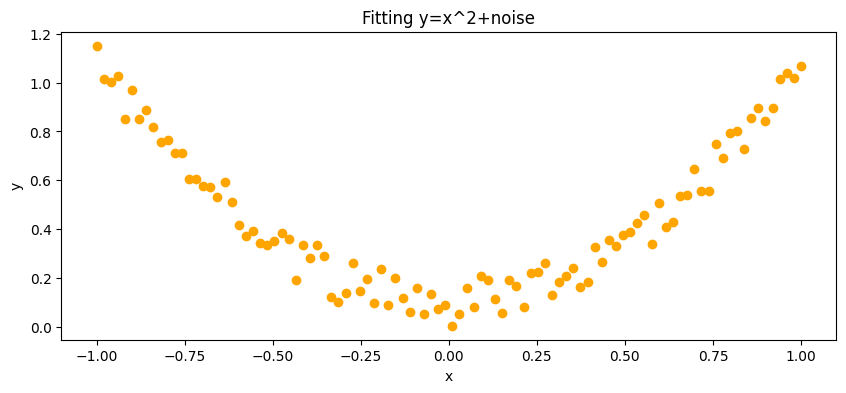

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


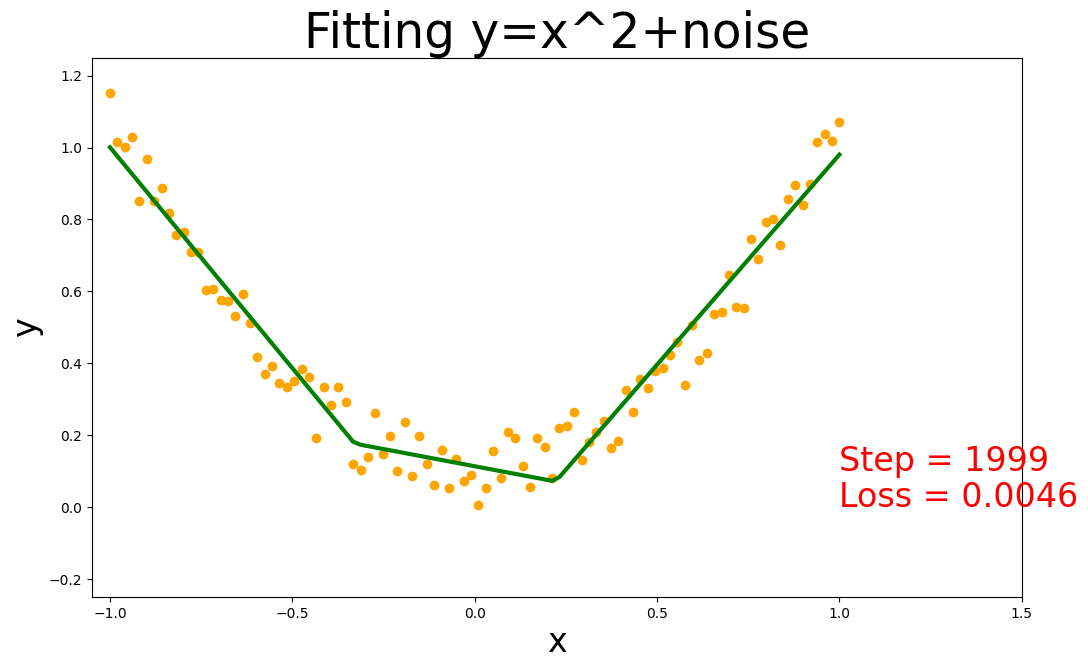

In [2]:
torch.manual_seed(1) # reproducible
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1) # input, shape=(100,1)
y=x.pow(2)+0.2*torch.rand(x.size()) # output, shape=(100,1)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Fitting y=x^2+noise')
plt.xlabel('x')
plt.ylabel('y')
!mkdir "08Fitting_PyTorch"
plt.savefig('08Fitting_PyTorch\Example1.eps')
plt.show()

# Create a sub-class, called `Net', of the class torch.nn.Module
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden) # hidden layer
        self.predict=torch.nn.Linear(n_hidden,n_output) # output layer

    def forward(self, x):
        x=F.relu(self.hidden(x)) # activation function for hidden layer
        x=self.predict(x) # linear output
        return x

net=Net(n_feature=1,n_hidden=10,n_output=1) # instance of the subclass Net
print(net) # net architecture
optimizer=torch.optim.SGD(net.parameters(),lr=0.05)
loss_func=torch.nn.MSELoss()  # mean squared loss

my_images=[]
fig,ax=plt.subplots(figsize=(12,7))

# train the network
for t in range(2000):
    yt=net(x)
    loss=loss_func(yt,y)
    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # compute gradients by back propagation
    optimizer.step() # update the parameters by applying gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Fitting y=x^2+noise',fontsize=35)
    ax.set_xlabel('x',fontsize=24)
    ax.set_ylabel('y',fontsize=24)
    ax.set_xlim(-1.05,1.5)
    ax.set_ylim(-0.25,1.25)
    ax.scatter(x.data.numpy(),y.data.numpy(),color = "orange")
    ax.plot(x.data.numpy(), yt.data.numpy(), 'g-', lw=3)
    ax.text(1.0,0.1,'Step = %d' % t,fontdict={'size':24,'color': 'red'})
    ax.text(1.0,0,'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size':24,'color': 'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw() # draw the canvas, cache the renderer
    image=np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image=image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    my_images.append(image)
    
# save images as a gif    
imageio.mimsave('08Fitting_PyTorch\Example1_SGD.gif',my_images,duration=10)

### Adam

- We try now the Adam variant of the stochastic gradient optimization algorithm.

Un sous-r‚pertoire ou un fichier 08Fitting_PyTorch existe d‚j….


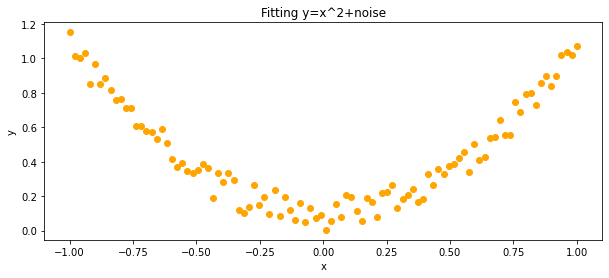

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


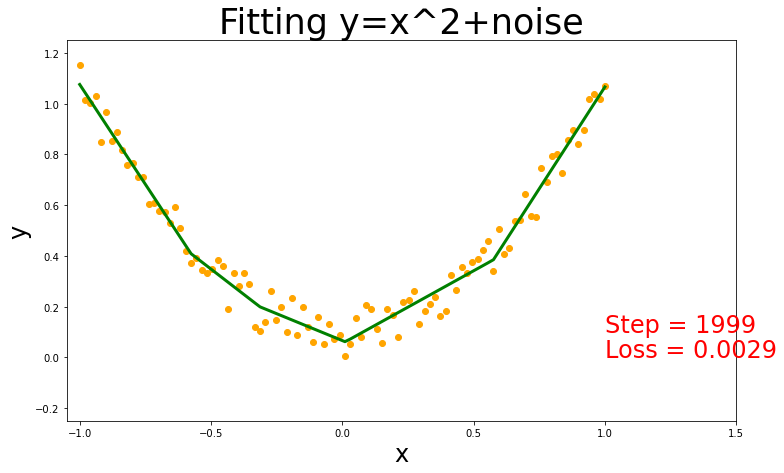

In [10]:
torch.manual_seed(1) # reproducible
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1) # input, shape=(100,1)
y=x.pow(2)+0.2*torch.rand(x.size()) # output, shape=(100,1)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Fitting y=x^2+noise')
plt.xlabel('x')
plt.ylabel('y')
!mkdir "08Fitting_PyTorch"
plt.savefig('08Fitting_PyTorch\Example1.eps')
plt.show()

# Create a sub-class, called `Net', of the class torch.nn.Module
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden) # hidden layer
        self.predict=torch.nn.Linear(n_hidden,n_output) # output layer

    def forward(self, x):
        x=F.relu(self.hidden(x)) # activation function for hidden layer
        x=self.predict(x) # linear output
        return x

net=Net(n_feature=1,n_hidden=10,n_output=1) # instance of the subclass Net
print(net) # net architecture
optimizer=torch.optim.Adam(net.parameters(),lr=0.05)
loss_func=torch.nn.MSELoss()  # mean squared loss

my_images=[]
fig,ax=plt.subplots(figsize=(12,7))

# train the network
for t in range(2000):
    yt=net(x)
    loss=loss_func(yt,y)
    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # compute gradients by back propagation
    optimizer.step() # update the parameters by applying gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Fitting y=x^2+noise',fontsize=35)
    ax.set_xlabel('x',fontsize=24)
    ax.set_ylabel('y',fontsize=24)
    ax.set_xlim(-1.05,1.5)
    ax.set_ylim(-0.25,1.25)
    ax.scatter(x.data.numpy(),y.data.numpy(),color = "orange")
    ax.plot(x.data.numpy(), yt.data.numpy(), 'g-', lw=3)
    ax.text(1.0,0.1,'Step = %d' % t,fontdict={'size':24,'color': 'red'})
    ax.text(1.0,0,'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size':24,'color': 'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw() # draw the canvas, cache the renderer
    image=np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image=image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    my_images.append(image)
    
# save images as a gif    
imageio.mimsave('08Fitting_PyTorch\Example1_Adam.gif',my_images,fps=10)

## Example 2: y=sin(x)+noise

### Network 1 

- Data points are generated as follows y=sin(x)+Z where Z is a Gaussian randon variable N(0,0.2).
- We firstly try the same network as in Example 1 (Network 1). Unfortunately, after about 500 steps, the algorithm gets stuck and can not iteratively move towards a better solution.

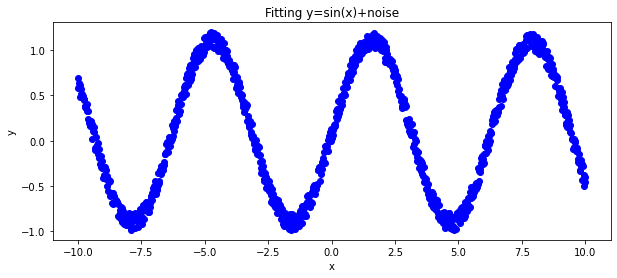

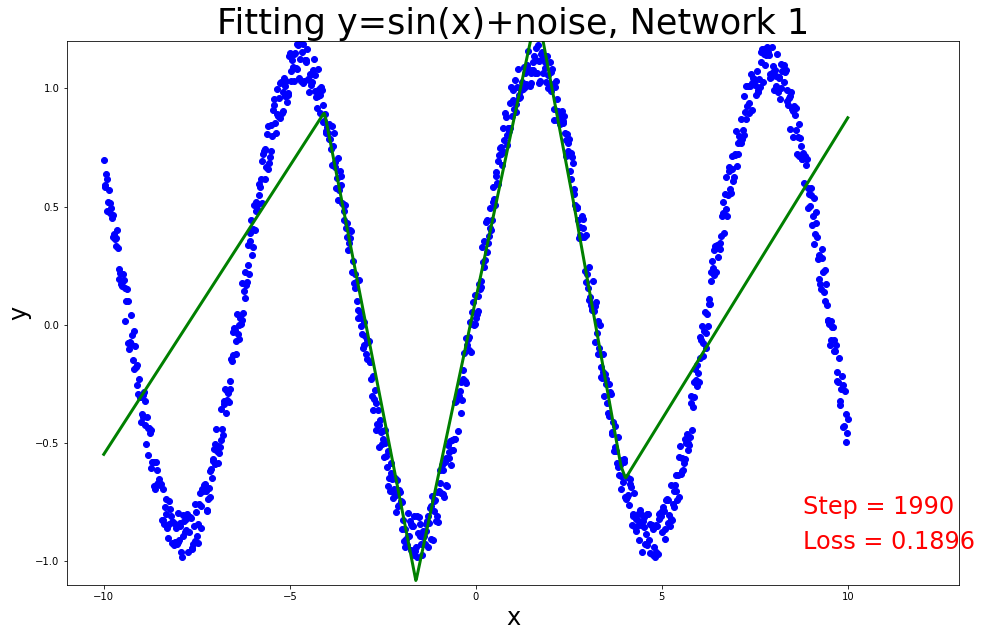

In [11]:
torch.manual_seed(1) # reproducible
x=torch.unsqueeze(torch.linspace(-10,10,1000),dim=1) # input, shape=(100,1)
y=torch.sin(x)+0.2*torch.rand(x.size())# output, shape=(100,1)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(),y.data.numpy(),color = "blue")
plt.title('Fitting y=sin(x)+noise')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('08Fitting_PyTorch\Example2.eps')
plt.show()

# Network 1
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden) # hidden layer
        self.predict=torch.nn.Linear(n_hidden,n_output) # output layer

    def forward(self, x):
        x=F.relu(self.hidden(x)) # activation function for hidden layer
        x=self.predict(x) # linear output
        return x

net=Net(n_feature=1,n_hidden=10,n_output=1) # instance of the subclass Net
optimizer=torch.optim.Adam(net.parameters(),lr=0.05)
loss_func=torch.nn.MSELoss() # mean squared loss

my_images=[]
fig,ax=plt.subplots(figsize=(16,10))

# train the network
for t in range(2000):
    yt=net(x)
    loss=loss_func(yt,y)
    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # compute gradients by back propagation
    optimizer.step() # update the parameters by applying gradients
    
    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        ax.set_title('Fitting y=sin(x)+noise, Network 1',fontsize=35)
        ax.set_xlabel('x',fontsize=24)
        ax.set_ylabel('y',fontsize=24)
        ax.set_xlim(-11.0,13.0)
        ax.set_ylim(-1.1,1.2)
        ax.scatter(x.data.numpy(),y.data.numpy(),color="blue")
        ax.plot(x.data.numpy(),yt.data.numpy(),'g-',lw=3)
        ax.text(8.8,-0.8,'Step = %d' % t,fontdict={'size':24,'color':'red'})
        ax.text(8.8, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                fontdict={'size': 24, 'color':  'red'})

        # Used to return the plot as an image array 
        # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
        fig.canvas.draw()       # draw the canvas, cache the renderer
        image=np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image=image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        my_images.append(image)

# save images as a gif    
imageio.mimsave('08Fitting_PyTorch\Example2_Network1.gif', my_images, fps=10)

### Network 2

- We consider a more complex neural network (Network 2). This one still has only one hidden layer, but it has now 200 nodes and is followed by a LeakyReLu function.
- With the same learning rate and the same number of steps, this larger network fits well data. In particular, it starts to curve near the local min and max.

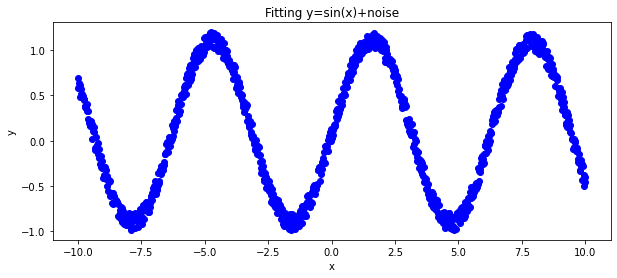

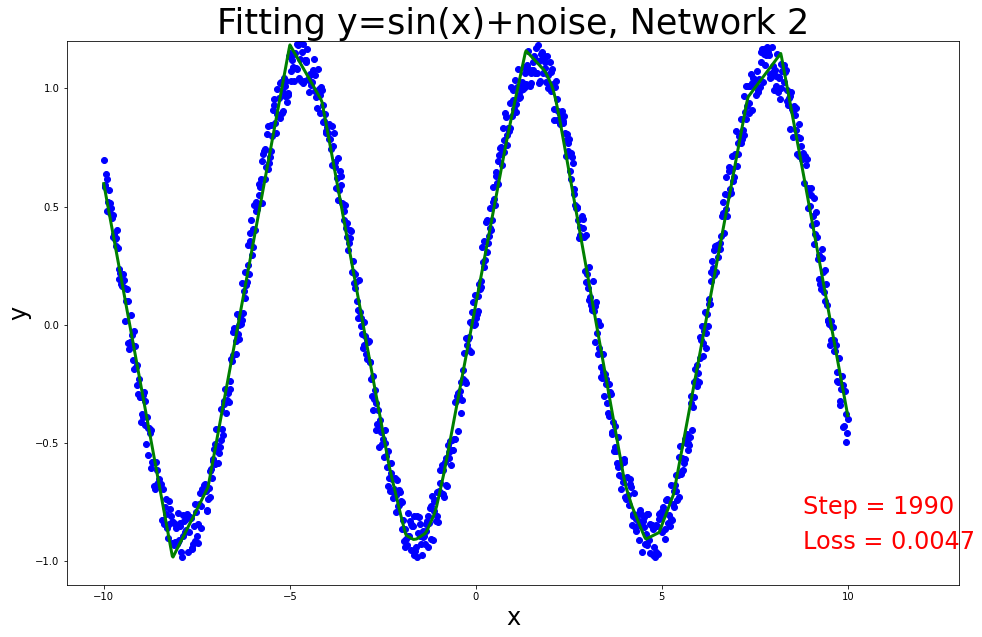

In [4]:
torch.manual_seed(1) # reproducible
x=torch.unsqueeze(torch.linspace(-10,10,1000),dim=1) # input, shape=(100,1)
y=torch.sin(x)+0.2*torch.rand(x.size())# output, shape=(100,1)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(),y.data.numpy(),color = "blue")
plt.title('Fitting y=sin(x)+noise')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('08Fitting_PyTorch\Example2.eps')
plt.show()

# Network 2
net = torch.nn.Sequential(
        torch.nn.Linear(1,200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200,1),
    )
optimizer=torch.optim.Adam(net.parameters(),lr=0.05)
loss_func=torch.nn.MSELoss() # mean squared loss

my_images=[]
fig,ax=plt.subplots(figsize=(16,10))

# train the network
for t in range(2000):
    yt=net(x)
    loss=loss_func(yt,y)
    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # compute gradients by back propagation
    optimizer.step() # update the parameters by applying gradients
    
    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        ax.set_title('Fitting y=sin(x)+noise, Network 2',fontsize=35)
        ax.set_xlabel('x',fontsize=24)
        ax.set_ylabel('y',fontsize=24)
        ax.set_xlim(-11.0,13.0)
        ax.set_ylim(-1.1,1.2)
        ax.scatter(x.data.numpy(),y.data.numpy(),color="blue")
        ax.plot(x.data.numpy(),yt.data.numpy(),'g-',lw=3)
        ax.text(8.8,-0.8,'Step = %d' % t,fontdict={'size':24,'color':'red'})
        ax.text(8.8,-0.95,'Loss = %.4f' % loss.data.numpy(),
                fontdict={'size':24,'color': 'red'})

        # Used to return the plot as an image array 
        # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
        fig.canvas.draw()       # draw the canvas, cache the renderer
        image=np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image=image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        my_images.append(image)

# save images as a gif    
imageio.mimsave('08Fitting_PyTorch\Example2_Network2.gif', my_images, fps=10)

### Network 3

- We consider now a more complex neural network (Network 3) with two hidden layers comprising 200 and 100 nodes respectively, each followed by a LeakyReLu.
- With this extra complexity, the neural network fits the data within 500 steps.

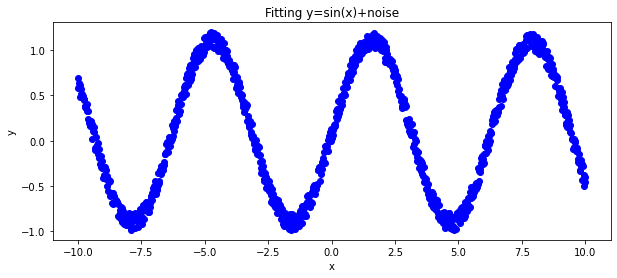

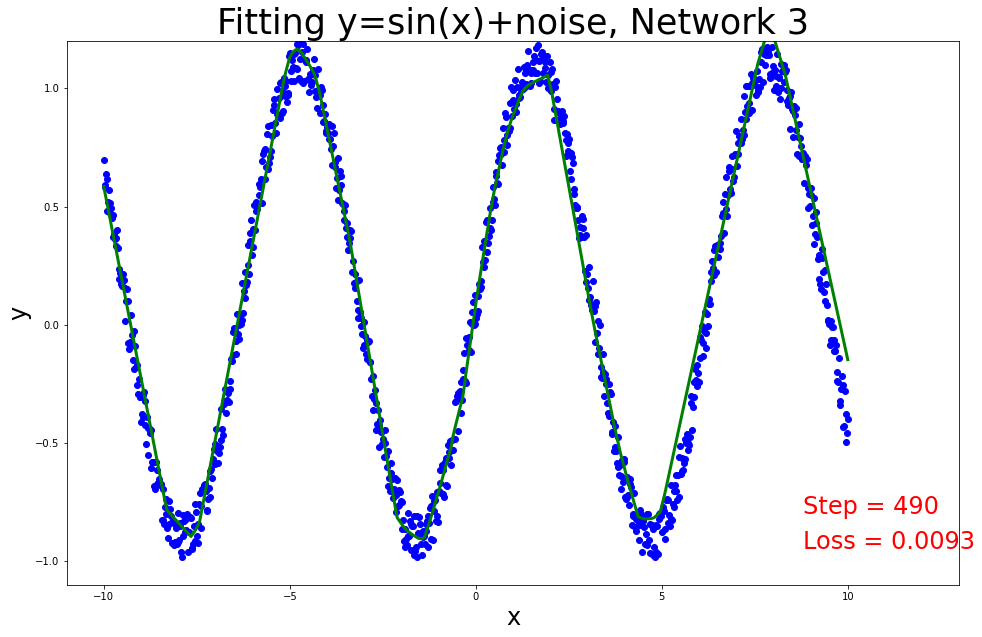

In [5]:
torch.manual_seed(1) # reproducible
x=torch.unsqueeze(torch.linspace(-10,10,1000),dim=1) # input, shape=(100,1)
y=torch.sin(x)+0.2*torch.rand(x.size())# output, shape=(100,1)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(),y.data.numpy(),color = "blue")
plt.title('Fitting y=sin(x)+noise')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('08Fitting_PyTorch\Example2.eps')
plt.show()

# Network 3
net = torch.nn.Sequential(
        torch.nn.Linear(1,200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200,100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100,1),
    )
optimizer=torch.optim.Adam(net.parameters(),lr=0.05)
loss_func=torch.nn.MSELoss() # mean squared loss

my_images=[]
fig,ax=plt.subplots(figsize=(16,10))

# train the network
for t in range(500):
    yt=net(x)
    loss=loss_func(yt,y)
    optimizer.zero_grad() # clear gradients for next train
    loss.backward() # compute gradients by back propagation
    optimizer.step() # update the parameters by applying gradients
    
    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        ax.set_title('Fitting y=sin(x)+noise, Network 3',fontsize=35)
        ax.set_xlabel('x',fontsize=24)
        ax.set_ylabel('y',fontsize=24)
        ax.set_xlim(-11.0,13.0)
        ax.set_ylim(-1.1,1.2)
        ax.scatter(x.data.numpy(),y.data.numpy(),color = "blue")
        ax.plot(x.data.numpy(),yt.data.numpy(), 'g-', lw=3)
        ax.text(8.8, -0.8, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
        ax.text(8.8, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                fontdict={'size': 24, 'color':  'red'})

        # Used to return the plot as an image array 
        # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
        fig.canvas.draw()       # draw the canvas, cache the renderer
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        my_images.append(image)

# save images as a gif    
imageio.mimsave('08Fitting_PyTorch\Example2_Network3.gif', my_images, fps=10)